In [2]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define transformations for training, validation, and testing datasets
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomRotation(40),
    transforms.RandomHorizontalFlip(),
    transforms.RandomResizedCrop(224),
    transforms.RandomAffine(degrees=0, shear=0.2, scale=(0.8, 1.2)),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalization values from ImageNet
])

val_test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalization values from ImageNet
])

# Load datasets
train_dir = '/kaggle/input/dry-fruit-classification-split/Split_Dataset/train'
val_dir = '/kaggle/input/dry-fruit-classification-split/Split_Dataset/val'

train_dataset = datasets.ImageFolder(root=train_dir, transform=train_transforms)
val_dataset = datasets.ImageFolder(root=val_dir, transform=val_test_transforms)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, drop_last=True)

In [3]:
# Importing ShuffleNet model from torchvision
import torch
from torch import nn

num_classes = 4  # Number of classes in the dataset

# Load pre-trained ShuffleNetV2 model
model = torch.hub.load('pytorch/vision:v0.10.0', 'shufflenet_v2_x1_0', pretrained=True)

# Modify the classifier to fit the number of output classes
model.fc = nn.Sequential(
    nn.Dropout(p=0.5),
    nn.Linear(model.fc.in_features, num_classes)  # Adjust to the number of classes
)

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ShuffleNet_V2_X1_0_Weights.IMAGENET1K_V1`. You can also use `weights=ShuffleNet_V2_X1_0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/shufflenetv2_x1-5666bf0f80.pth" to /root/.cache/torch/hub/checkpoints/shufflenetv2_x1-5666bf0f80.pth
100%|██████████| 8.79M/8.79M [00:00<00:00, 78.1MB/s]


In [4]:
model

ShuffleNetV2(
  (conv1): Sequential(
    (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (stage2): Sequential(
    (0): InvertedResidual(
      (branch1): Sequential(
        (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=24, bias=False)
        (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Conv2d(24, 58, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (3): BatchNorm2d(58, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (4): ReLU(inplace=True)
      )
      (branch2): Sequential(
        (0): Conv2d(24, 58, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(58, eps=1e-05, momentum=0.1, affine=True, track_running_

Training on: cuda


Epoch 1/15: 100%|██████████| 251/251 [02:01<00:00,  2.07it/s, loss=1.01] 


Epoch [1/15], Loss: 1.0149, Accuracy: 76.89% | Val Loss: 0.3971, Val Accuracy: 97.66%
Best model saved with validation accuracy: 97.66% at epoch 1


Epoch 2/15: 100%|██████████| 251/251 [01:10<00:00,  3.56it/s, loss=0.321]


Epoch [2/15], Loss: 0.3211, Accuracy: 93.18% | Val Loss: 0.0909, Val Accuracy: 99.65%
Best model saved with validation accuracy: 99.65% at epoch 2


Epoch 3/15: 100%|██████████| 251/251 [01:10<00:00,  3.55it/s, loss=0.192] 


Epoch [3/15], Loss: 0.1921, Accuracy: 94.43% | Val Loss: 0.0342, Val Accuracy: 99.74%
Best model saved with validation accuracy: 99.74% at epoch 3


Epoch 4/15: 100%|██████████| 251/251 [01:09<00:00,  3.60it/s, loss=0.159] 


Epoch [4/15], Loss: 0.1589, Accuracy: 94.61% | Val Loss: 0.0271, Val Accuracy: 99.74%


Epoch 5/15: 100%|██████████| 251/251 [01:09<00:00,  3.60it/s, loss=0.135] 


Epoch [5/15], Loss: 0.1347, Accuracy: 95.37% | Val Loss: 0.0244, Val Accuracy: 99.57%


Epoch 6/15: 100%|██████████| 251/251 [01:10<00:00,  3.57it/s, loss=0.117] 


Epoch [6/15], Loss: 0.1168, Accuracy: 96.00% | Val Loss: 0.0120, Val Accuracy: 99.91%
Best model saved with validation accuracy: 99.91% at epoch 6


Epoch 7/15: 100%|██████████| 251/251 [01:09<00:00,  3.60it/s, loss=0.113] 


Epoch [7/15], Loss: 0.1129, Accuracy: 95.69% | Val Loss: 0.0175, Val Accuracy: 99.65%


Epoch 8/15: 100%|██████████| 251/251 [01:10<00:00,  3.58it/s, loss=0.109] 


Epoch [8/15], Loss: 0.1090, Accuracy: 95.97% | Val Loss: 0.0101, Val Accuracy: 99.83%


Epoch 9/15: 100%|██████████| 251/251 [01:08<00:00,  3.65it/s, loss=0.0923]


Epoch [9/15], Loss: 0.0923, Accuracy: 96.41% | Val Loss: 0.0095, Val Accuracy: 99.83%


Epoch 10/15: 100%|██████████| 251/251 [01:08<00:00,  3.67it/s, loss=0.102] 


Epoch [10/15], Loss: 0.1021, Accuracy: 96.23% | Val Loss: 0.0098, Val Accuracy: 99.65%


Epoch 11/15: 100%|██████████| 251/251 [01:09<00:00,  3.63it/s, loss=0.0872]


Epoch [11/15], Loss: 0.0872, Accuracy: 96.44% | Val Loss: 0.0114, Val Accuracy: 99.74%


Epoch 12/15: 100%|██████████| 251/251 [01:08<00:00,  3.67it/s, loss=0.094] 


Epoch [12/15], Loss: 0.0940, Accuracy: 96.34% | Val Loss: 0.0076, Val Accuracy: 99.91%


Epoch 13/15: 100%|██████████| 251/251 [01:09<00:00,  3.59it/s, loss=0.083] 


Epoch [13/15], Loss: 0.0830, Accuracy: 96.90% | Val Loss: 0.0056, Val Accuracy: 99.91%


Epoch 14/15: 100%|██████████| 251/251 [01:10<00:00,  3.58it/s, loss=0.0806]


Epoch [14/15], Loss: 0.0806, Accuracy: 96.73% | Val Loss: 0.0055, Val Accuracy: 99.91%


Epoch 15/15: 100%|██████████| 251/251 [01:09<00:00,  3.61it/s, loss=0.081] 


Epoch [15/15], Loss: 0.0810, Accuracy: 97.00% | Val Loss: 0.0065, Val Accuracy: 99.83%


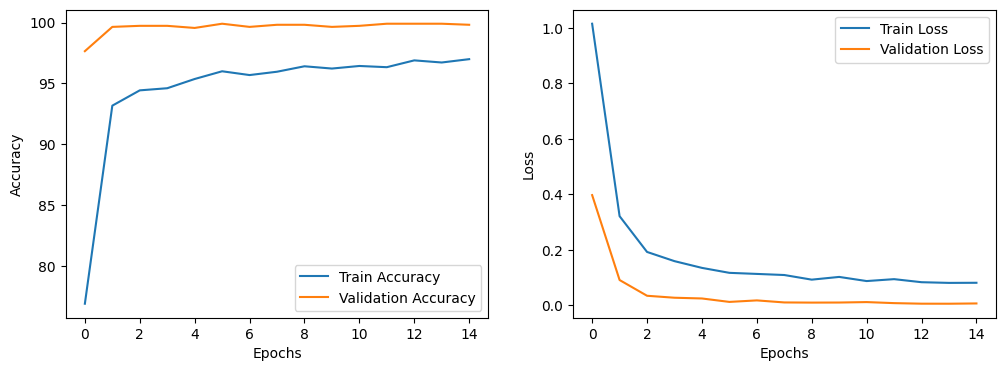

In [5]:
# The rest of your training, validation, and testing code remains unchanged.
import torch
from torch import nn, optim
from tqdm import tqdm
import matplotlib.pyplot as plt

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()  # For multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Training on: {device}")
model.to(device)

# Training loop
num_epochs = 15  # Set your desired number of epochs

# For tracking accuracy and loss
train_acc_history = []
val_acc_history = []
train_loss_history = []
val_loss_history = []

best_accuracy = 0

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    # Use tqdm for tracking batches inside the epoch
    progress_bar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}')
    
    for images, labels in progress_bar:
        # Move data to GPU if available
        images, labels = images.to(device), labels.to(device)
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Accumulate loss
        running_loss += loss.item()
        
        # Predictions and accuracy calculation
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
        
        # Update the progress bar description with current loss
        progress_bar.set_postfix(loss=running_loss/len(train_loader))
    
    # Calculate training accuracy and loss
    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct_train / total_train
    
    # Append for later plotting
    train_acc_history.append(train_accuracy)
    train_loss_history.append(train_loss)

    # Validation phase
    model.eval()  # Set the model to evaluation mode
    correct_val = 0
    total_val = 0
    running_val_loss = 0.0
    
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            val_loss = criterion(outputs, labels)
            running_val_loss += val_loss.item()
            
            _, predicted = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()
    
    # Calculate validation accuracy and loss
    val_loss = running_val_loss / len(val_loader)
    val_accuracy = 100 * correct_val / total_val
    
    # Append for later plotting
    val_acc_history.append(val_accuracy)
    val_loss_history.append(val_loss)
    
    # Print epoch statistics
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.2f}% | '
          f'Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%')

    # Save the best model
    if val_accuracy > best_accuracy:
        torch.save(model.state_dict(), f"best_model_epoch_{epoch+1}_val_acc_{val_accuracy:.2f}.pth")
        print(f"Best model saved with validation accuracy: {val_accuracy:.2f}% at epoch {epoch+1}")
        best_accuracy = val_accuracy

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_acc_history, label='Train Accuracy')
plt.plot(val_acc_history, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(train_loss_history, label='Train Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [11]:
# Import the time module
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define the same transformations as used for validation/test
val_test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to the same size as during training
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Standard normalization
])

# Define the path for the test dataset
test_dir = '/kaggle/input/dry-fruit-classification-split/Split_Dataset/test'

# Load the test dataset
test_dataset = datasets.ImageFolder(root=test_dir, transform=val_test_transforms)

# Create the test data loader
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, drop_last=True)

# Print the size of the test dataset
print(f"Test dataset has {len(test_dataset)} samples.")


Test dataset has 2308 samples.


In [13]:
import time  
# Function to test the model on the test dataset
def test_model(model, test_loader, device):
    model.eval()  # Set model to evaluation mode
    correct_test = 0
    total_test = 0

    start_time = time.time()  # Start the timer
    
    with torch.no_grad():  # No need to compute gradients for testing
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)  # Move data to the appropriate device
            outputs = model(images)  # Forward pass
            _, predicted = torch.max(outputs, 1)  # Get the predicted class
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()  # Compare predictions with true labels
    
    test_accuracy = 100 * correct_test / total_test  # Calculate accuracy
    end_time = time.time()  # End the timer
    
    # Calculate execution time
    execution_time = end_time - start_time
    print(f"Test Accuracy: {test_accuracy:.2f}%")
    print(f"Execution Time: {execution_time:.2f} seconds")  # Print the execution time
    
    return test_accuracy

# Load the best saved ShuffleNet model
best_model_path = "/kaggle/working/best_model_epoch_6_val_acc_99.91.pth"  # Replace this with your best model path
model.load_state_dict(torch.load(best_model_path))
model.to(device)

# Test the model on the test dataset
print("Testing the best model on the test set...")
test_model(model, test_loader, device)

/tmp/ipykernel_30/3854984684.py:30: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path))


Testing the best model on the test set...
Test Accuracy: 99.91%
Execution Time: 12.46 seconds


99.91319444444444